## Winding number

Notebook to make different subplots for the winding number block diagram

In [6]:
%load_ext autoreload
%autoreload 2

import sys
import os
current_directory = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_directory, os.pardir)))

import numpy as np
import matplotlib.pyplot as plt
from mayavi import mlab
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import CubicSpline
from geom_lrr.loader import Loader
from geom_lrr.analyzer import compute_winding, compute_regression, median_slope
from geom_lrr.plotter import plot_regression

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load in sequence, compute winding number, and compute breakpoints

In [7]:
#protid = "AT1G72840.2"
protid = "AT3G44400.1"
loader = Loader()
loader.load_single("../data/a_thaliana_other", f"{protid}.pdb")
X = loader.structures[protid]
winding_res = compute_winding(X)
winding = winding_res["winding"]

regression_res = compute_regression(winding, n_breakpoints=2)
breakpoints = regression_res["breakpoints"]

## Make Plot of Frame in 3D

In [8]:
cyan = (0.322, 0.686, 0.663)
yellow = (0.867, 0.847, 0.471)
red1 = (0.561, 0.208, 0.173)
purple = (0.476, 0.192, 0.475)
green1 = (0.69, 0.875, 0.667)
green2 = (0.016, 0.439, 0.18)

from mayavi import mlab

loader = Loader()
loader.load_single("../data/a_thaliana_other", f"{protid}.pdb")

fac = 10 # Interpolation factor
X = loader.structures[protid]
spline = CubicSpline(np.linspace(0, 1, X.shape[0]), X, axis=0)
t = np.linspace(0, 1, fac*X.shape[0])
X = spline(t)

mol_plot = mlab.plot3d(X[:, 0], X[:, 1], X[:, 2], np.arange(X.shape[0]), colormap='magma', tube_radius=0.5, representation='surface')
B = winding_res["backbone"]
N = winding_res["normal_bundle"]
offset = 5
B1 = B + offset*N[:, 0, :]
B2 = B + offset*N[:, 1, :]

backbone_plot = mlab.plot3d(B[:, 0], B[:, 1], B[:, 2], color=cyan, tube_radius=0.3, representation='surface')
mlab.plot3d(B1[:, 0], B1[:, 1], B1[:, 2], color=green1, tube_radius=0.3, representation='surface')
mlab.plot3d(B2[:, 0], B2[:, 1], B2[:, 2], color=green2, tube_radius=0.3, representation='surface')

scene = mlab.gcf().scene
scene.parallel_projection = True
scene.background = (1, 1, 1)
#mlab.savefig("out.png", size=(1000, 1000))
mlab.show()




## Straightened Helix

In [9]:
F = winding_res["flattened"]
F = np.zeros((F.shape[0], 3))
F[:, 0:2] = winding_res["flattened"]
F[:, 2] = np.linspace(0, 100, F.shape[0])
spline = CubicSpline(np.linspace(0, 1, F.shape[0]), F, axis=0)
fac = 10
t = np.linspace(0, 1, fac*F.shape[0])
F = spline(t)

mol_plot = mlab.plot3d(F[:, 0], F[:, 1], F[:, 2], np.arange(F.shape[0]), colormap='magma', tube_radius=0.5, representation='surface')
offset = 5
F[:, 0:2] = 0
mlab.plot3d(F[:, 0], F[:, 1], F[:, 2], color=cyan, tube_radius=0.3, representation='surface')
F[:, 0] = offset
mlab.plot3d(F[:, 0], F[:, 1], F[:, 2], color=green1, tube_radius=0.3, representation='surface')
F[:, 0] = 0
F[:, 1] = offset
mlab.plot3d(F[:, 0], F[:, 1], F[:, 2], color=green2, tube_radius=0.3, representation='surface')

#backbone_plot = mlab.plot3d(B[:, 0], B[:, 1], B[:, 2], color=cyan, tube_radius=0.3, representation='surface')
#mlab.plot3d(B1[:, 0], B1[:, 1], B1[:, 2], color=green1, tube_radius=0.3, representation='surface')
#mlab.plot3d(B2[:, 0], B2[:, 1], B2[:, 2], color=green2, tube_radius=0.3, representation='surface')

scene = mlab.gcf().scene
scene.parallel_projection = True
scene.background = (1, 1, 1)
#mlab.savefig("out.png", size=(1000, 1000))
mlab.show()




## Make plot showing winding number and flattened projection

/var/folders/83/vwtnzcdn1v99b_lf0k0gsjzr0000gn/T/ipykernel_10690/1066901651.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(0, 0, c=cyan, s=100, zorder=200)


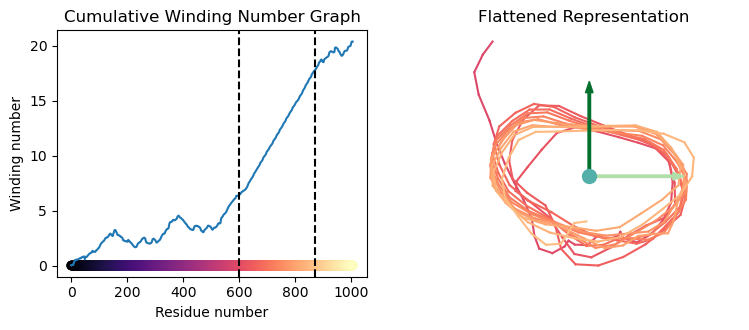

In [10]:
F = winding_res["flattened"]
interval = [breakpoints[0]+80, breakpoints[1]-30]
rg = np.arange(*interval)

lut = mol_plot.module_manager.scalar_lut_manager.lut.table.to_array().astype(float)/255
spline = CubicSpline(np.arange(lut.shape[0]), lut, axis=0)
t = np.linspace(0, 255, F.shape[0])

fac = 0.8
plt.figure(figsize=(fac*11, fac*4))
plt.subplot(121)
plt.plot(winding)
plt.xlabel("Residue number")
plt.ylabel("Winding number")
plt.title("Cumulative Winding Number Graph")
plt.scatter(np.arange(F.shape[0]), np.zeros(F.shape[0]), c=np.clip(spline(t), 0, 1))
for b in interval:
    plt.axvline(b, linestyle='--', c='k')

plt.subplot(122)
colors = spline(t[rg])
#plt.scatter(F[rg, 0], F[rg, 1], c=colors)
for i, c in zip(rg, colors):
    plt.plot(F[i:i+2, 0], F[i:i+2, 1], c=c)
plt.scatter(0, 0, c=cyan, s=100, zorder=200)
offset = 10
plt.arrow(0, 0, offset, 0, zorder=100, width=0.3, facecolor=green1, edgecolor=green1)
plt.arrow(0, 0, 0, offset, zorder=100, width=0.3, facecolor=green2, edgecolor=green2)
plt.axis("equal")

plt.axis("off")
plt.title("Flattened Representation")
plt.savefig("WindingNumber_Plots.svg", bbox_inches='tight')